In [88]:
%matplotlib notebook

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv('../flight-delays/flights.csv')
df["total_delay"] = df["DEPARTURE_DELAY"] + df["ARRIVAL_DELAY"]
df.head()

C:\Users\sters\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,total_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-33.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-17.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-14.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-22.0


In [91]:
columns = df.columns
columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'total_delay'],
      dtype='object')

In [92]:
months = df['MONTH'].value_counts()
months

7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64

In [93]:
months_df = pd.DataFrame(months).sort_index()
months_df.index.name = 'Month'
months_df.rename(columns={'MONTH': 'Delay Count'},
                 index={1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
                 inplace=True)
months_df

,Delay Count
Month,
January,469968
February,429191
March,504312
April,485151
May,496993
June,503897
July,520718
August,510536
September,464946


In [94]:
weekday = df['DAY_OF_WEEK'].value_counts()
weekday

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64

In [95]:
weekday_df = pd.DataFrame(weekday).sort_index()
weekday_df.index.name = 'Day of Week'
weekday_df.rename(columns={'DAY_OF_WEEK': 'Delay Count'},
                 index={1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'},
                 inplace=True)
weekday_df

,Delay Count
Day of Week,
Monday,865543
Tuesday,844600
Wednesday,855897
Thursday,872521
Friday,862209
Saturday,700545
Sunday,817764


<IPython.core.display.Javascript object>


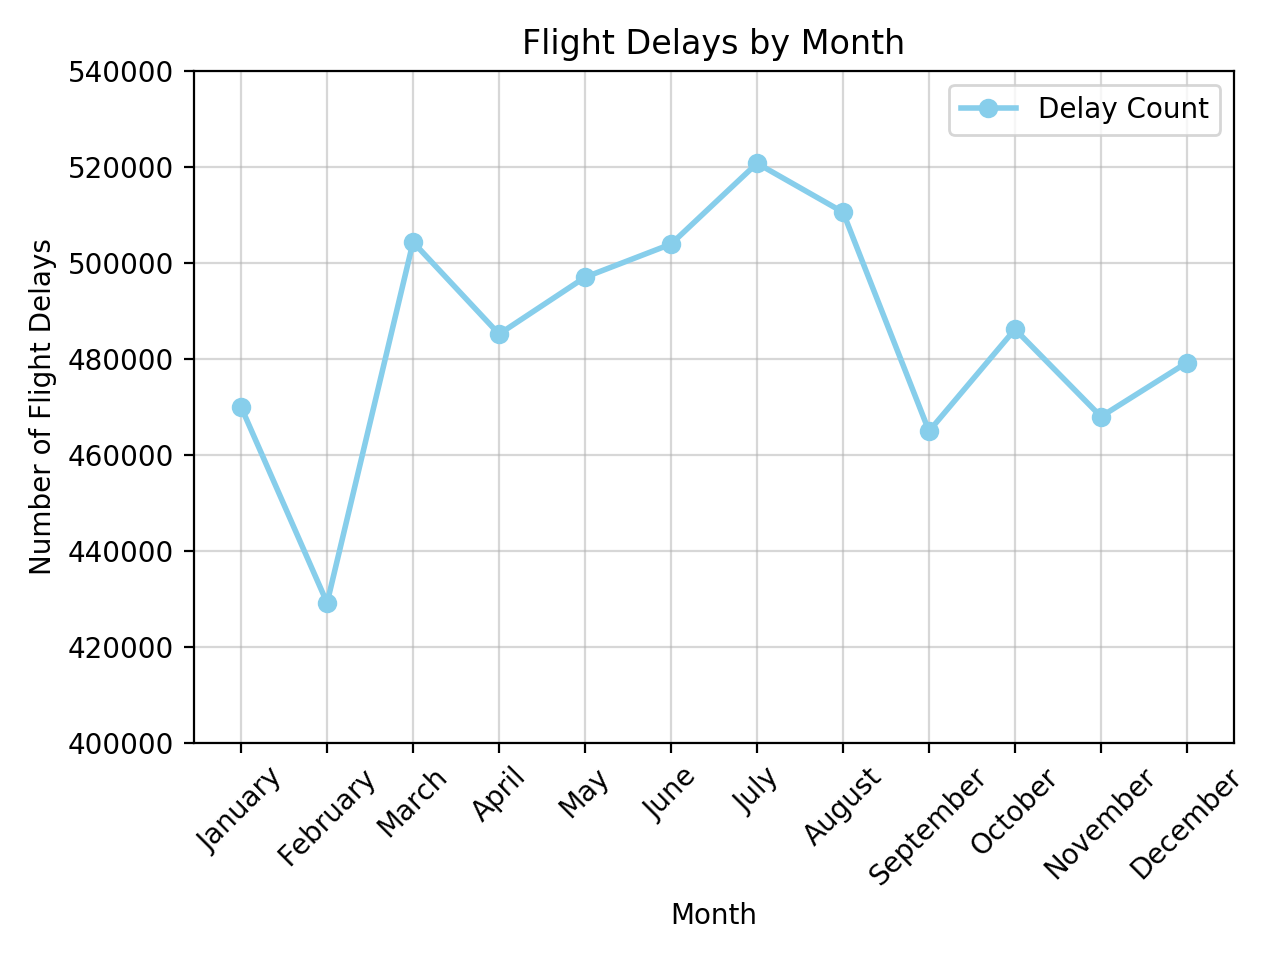

In [106]:
months_df.plot(marker="o", color="skyblue", linewidth=2, rot=45)
plt.title("Flight Delays by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flight Delays")
plt.ylim(ymin=400000, ymax=540000)
plt.xticks(np.arange(12), months_df.index)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Months')

<IPython.core.display.Javascript object>


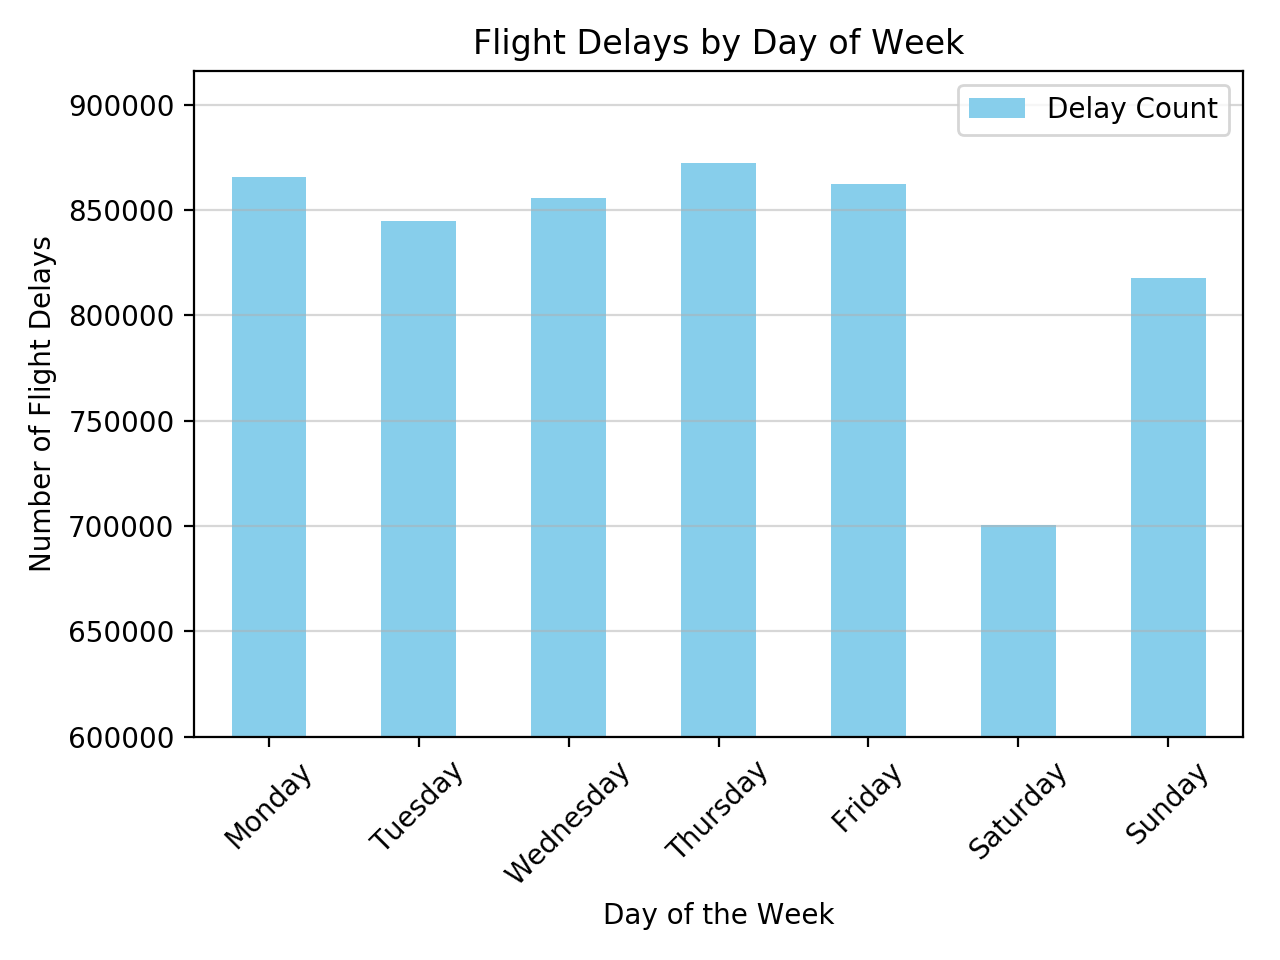

In [108]:
weekday_df.plot(kind="bar", title="Day of the Week", facecolor="skyblue", alpha=1, align="center", rot=45)
plt.title("Flight Delays by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flight Delays")
plt.ylim(ymin=600000)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Days')